# Capstone Project: Customer Churn Prediction

**This project aims to develop a predictive model that can estimate the Customer churn in the telecom industry. By analyzing historical customer data sourced from Kaggle, we'll identify key factors influencing customer behavior and build a robust model to forecast future value. This will enable the telecom company to make data-driven decisions, such as targeted marketing campaigns and personalized customer experiences, to maximize long-term profitability.**

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score


Loading the Data using pandas.

In [2]:
#reading the file
mobile = pd.read_csv('/content/Customer Churn new.csv')
mobile

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,3532,15653251,Hickey,408,France,Female,84,8,87873.39,188484.52,1
9996,3034,15578006,Yao,787,France,Female,85,10,0.00,116537.96,0
9997,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,52952.24,0
9998,6444,15764927,Rogova,753,France,Male,92,3,121513.31,195563.99,0


Exploring the characterstics of data their types and basic statistics.

In [3]:
mobile.head()
#displaying first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0


In [4]:
mobile.shape
#displaying number of (rows, columns)

(10000, 11)

In [5]:
mobile.size
#displaying the dataframe size

110000

In [6]:
mobile.columns
#displaying all the columns name

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
mobile.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [8]:
mobile.describe()
#displaying statistical properties of dataframe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


In [9]:
mobile.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [10]:
mobile.isnull().sum()
#checking for null values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
EstimatedSalary,0


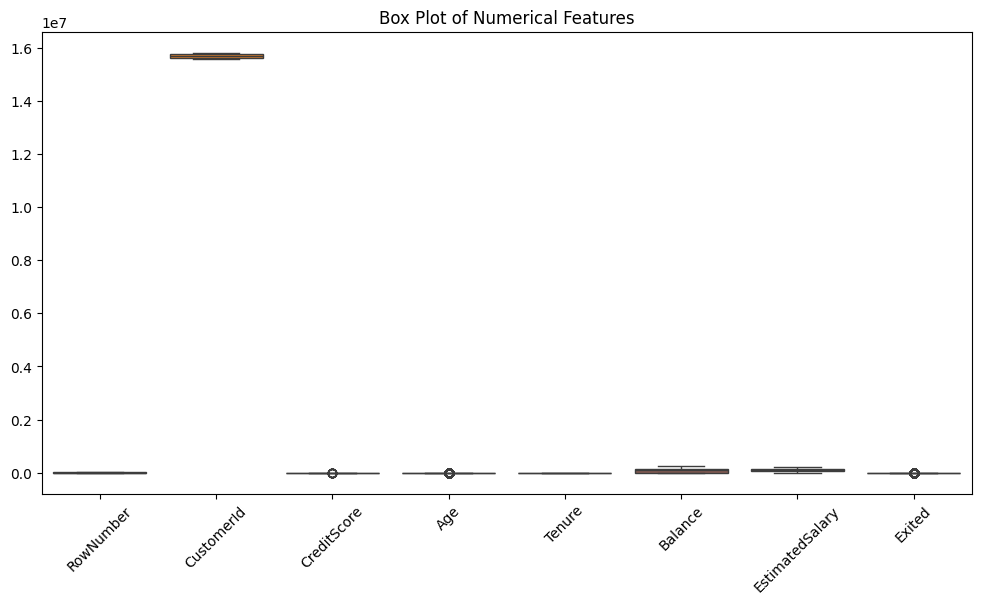

In [11]:
#checking for outliers
#Visualizing outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=mobile)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [12]:
#Analyzing the distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

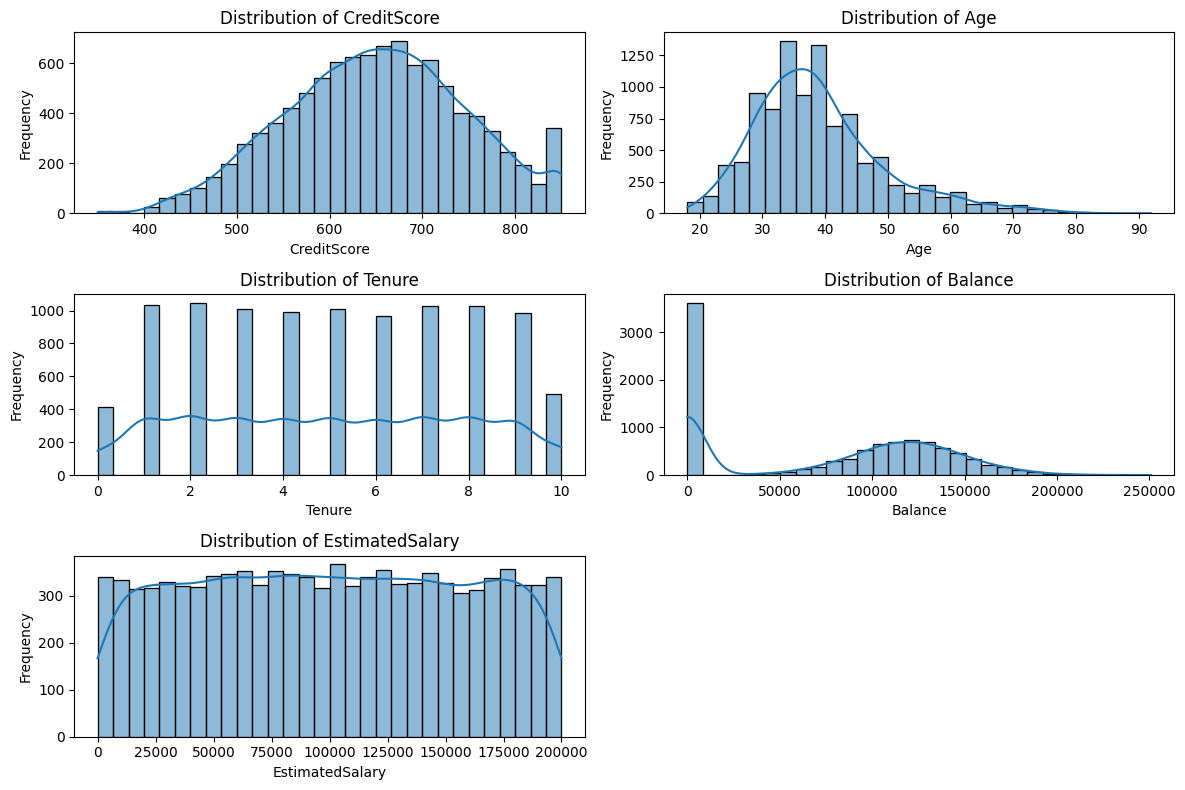

In [13]:
#Creating histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Adjusting to a 3x2 grid for better layout
    sns.histplot(mobile[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Data Cleaning**

In [14]:
#Dropping columns that is not needed in the model
mobile = mobile.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [15]:
#Converting categorical variables into dummy variables (one-hot encoding)
mobile = pd.get_dummies(mobile, drop_first=True)

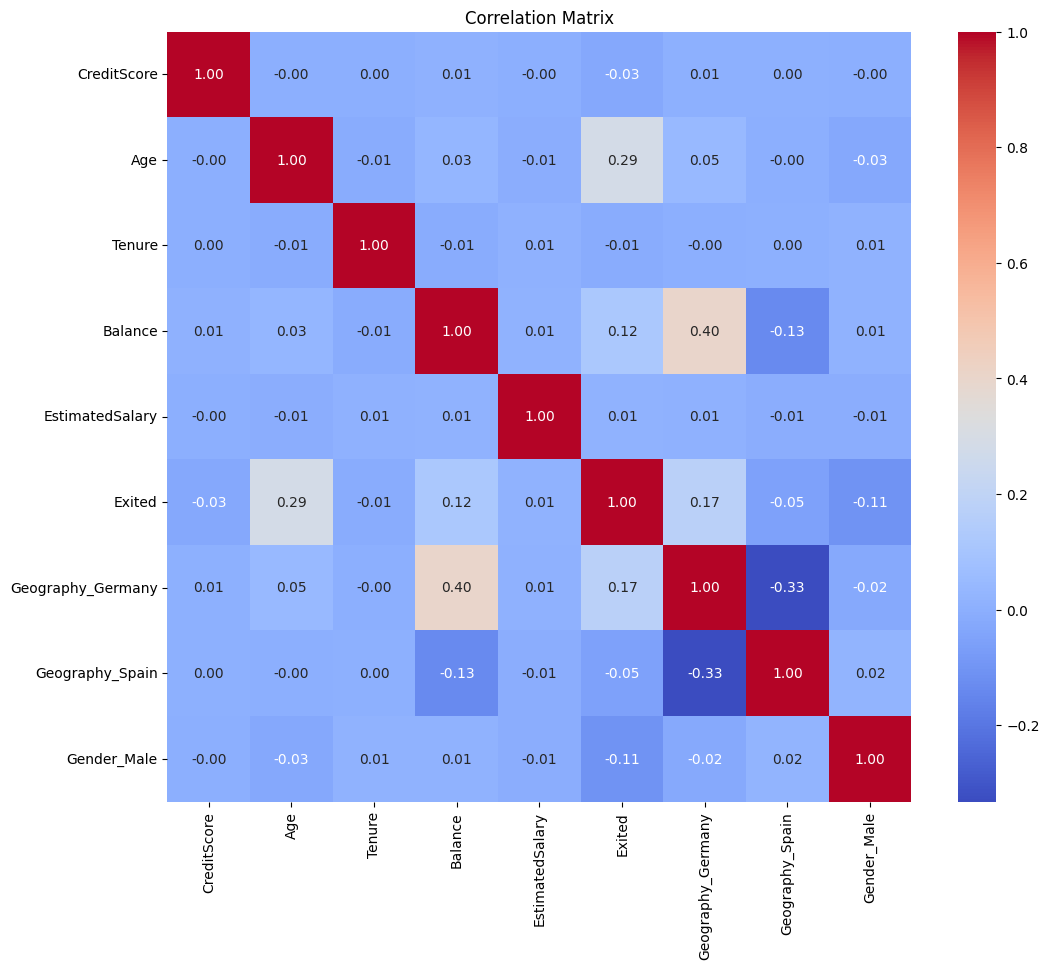

In [16]:
#Calculating the correlation matrix
correlation_matrix = mobile.corr()

#Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Investigating correlation with churn (Exited)
churn_correlation = correlation_matrix['Exited'].sort_values(ascending=False)
print("Correlation with Exited (Churn):")
print(churn_correlation)

Correlation with Exited (Churn):
Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
Tenure              -0.014001
CreditScore         -0.027094
Geography_Spain     -0.052667
Gender_Male         -0.106512
Name: Exited, dtype: float64


The correlation analysis reveals that older customers, those from Germany, and those with higher balances or wealth indices are more likely to churn. Conversely, younger customers, those from Spain, and those with higher credit scores or longer tenure are less likely to churn. These insights can be used to target specific customer segments for retention efforts and improve overall customer satisfaction.

**Feature Engineering**

Creating new features that might be helpful in predicting Customer Lifetime Value (CLV), such as Monetary Value and Tenure Length.

In [18]:
#Creating features
mobile['MonetaryValue'] = mobile['Balance'] * mobile['EstimatedSalary'] / mobile['Balance'].max()

#Creating a feature to measure customer tenure (which could reflect how long they've been loyal)
mobile['TenureLength'] = mobile['Tenure'] * mobile['Age']


In [19]:
#Assigning columns to features and target
X = mobile.drop(columns=['Exited'])
y = mobile['Exited']

In [20]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

Building a basic Random Forest Classifier to build a model for customer churn prediction.

In [21]:
#Initializing the Random Forest model
model = RandomForestClassifier(random_state=42)

In [22]:
#Fitting the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
#Predicting on the test set
y_pred = model.predict(X_test)

In [24]:
#Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1590
           1       0.61      0.27      0.38       410

    accuracy                           0.81      2000
   macro avg       0.72      0.61      0.63      2000
weighted avg       0.79      0.81      0.79      2000

Confusion Matrix:
 [[1518   72]
 [ 298  112]]


**Hyperparameter Tuning Using RandomizedSearchCV**

Optimizing the model by tuning the hyperparameters using RansomizedSearchCV. This will help us find the best combination of hyperparameters for the Random Forest model.

**NOTE:** Used RandomizedSearchCV for tuning because GridSearchCV was taking too long for computation.

In [25]:
#Defining the parameter distribution (ranges) instead of grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Random sample n_estimators from 100 to 1000
    'max_depth': [10, 20, 30, None],             # Random sample max_depth values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [26]:
#Initializing RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [27]:
#Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

In [28]:
#Fitting RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


 **Retrain Model with Best Hyperparameters**

After finding the best hyperparameters, retraining the model using those parameters.

In [29]:
#Getting the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

In [30]:
#Retraining the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [31]:
#Predicting on the test set
y_pred = best_rf_model.predict(X_test)

**Model Evaluation**

Evaluating the performance of the model using metrics like accuracy, precision, recall, F1-score, and AUC.

In [34]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#ROC AUC score
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8165
ROC AUC Score: 0.7797


In [35]:
#Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1590
           1       0.63      0.26      0.37       410

    accuracy                           0.82      2000
   macro avg       0.73      0.61      0.63      2000
weighted avg       0.79      0.82      0.79      2000

Confusion Matrix:
 [[1526   64]
 [ 303  107]]


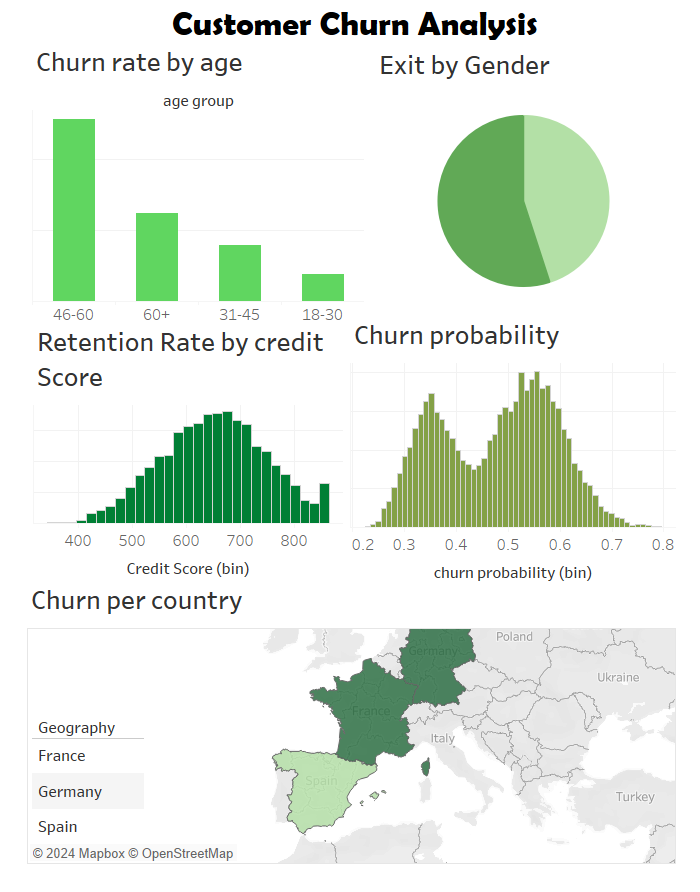

In [1]:
from google.colab.patches import cv2_imshow
import cv2

img_path = '/content/Screenshot 2024-11-04 232439.png'
img = cv2.imread(img_path)
cv2_imshow(img)
#Following is the png file of the dashboard created

**Project Summary and Findings**

The analysis of the telecom customer churn data revealed that older customers, particularly those aged 46-60, and male customers are more likely to churn. Additionally, customers with lower credit scores and those residing in specific regions, such as Germany and France, tend to churn more frequently.

To address these issues, we recommend implementing targeted retention campaigns for at-risk customer segments, improving customer service quality, enhancing the digital experience, conducting competitive analysis to identify unique value propositions, and continuously monitoring customer behavior. By taking these proactive steps, the telecom company can effectively reduce customer churn and strengthen customer relationships, ultimately driving long-term growth and profitability.